Importacion de datos y medidas de las variables de los datos

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [4]:
data.corr(numeric_only=True)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


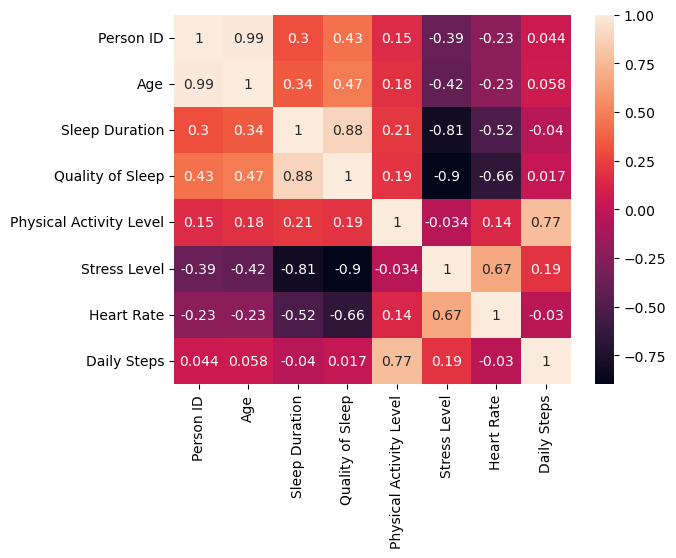

In [5]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot = True)
r = 1.1
plt.rcParams['figure.figsize'] = (r*16,r*9)  # Ajuste de imagen, modifique respecto a su resolución.

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      374 non-null    int64
 1   Quality of Sleep         374 non-null    int64
 2   Physical Activity Level  374 non-null    int64
 3   Heart Rate               374 non-null    int64
dtypes: int64(4)
memory usage: 11.8 KB


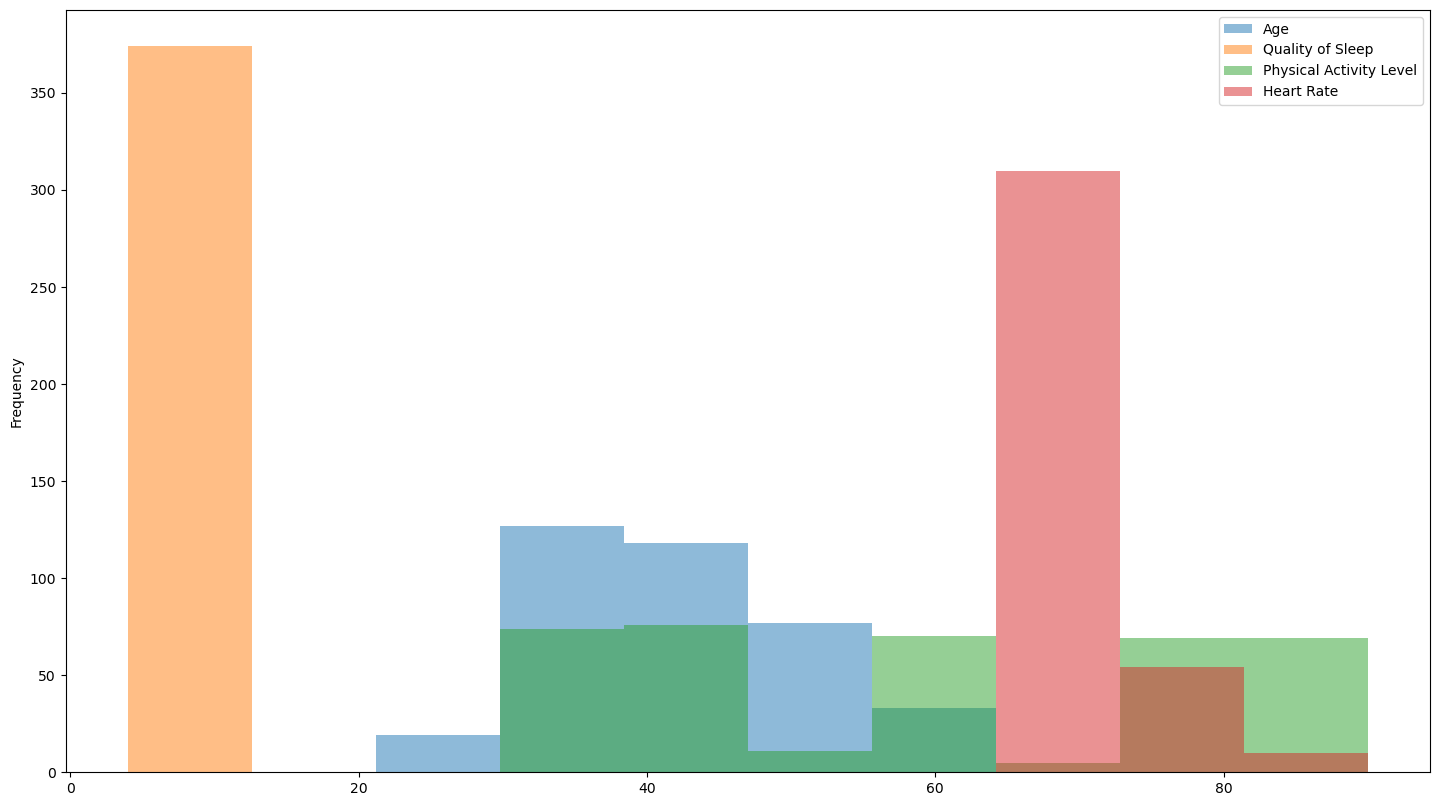

In [7]:
columnas_buscadas = ['Age','Quality of Sleep','Physical Activity Level','Heart Rate']
dataExaminada=data[columnas_buscadas]
dataExaminada.info()
dataExaminada.plot.hist(alpha=0.5);

<Axes: >

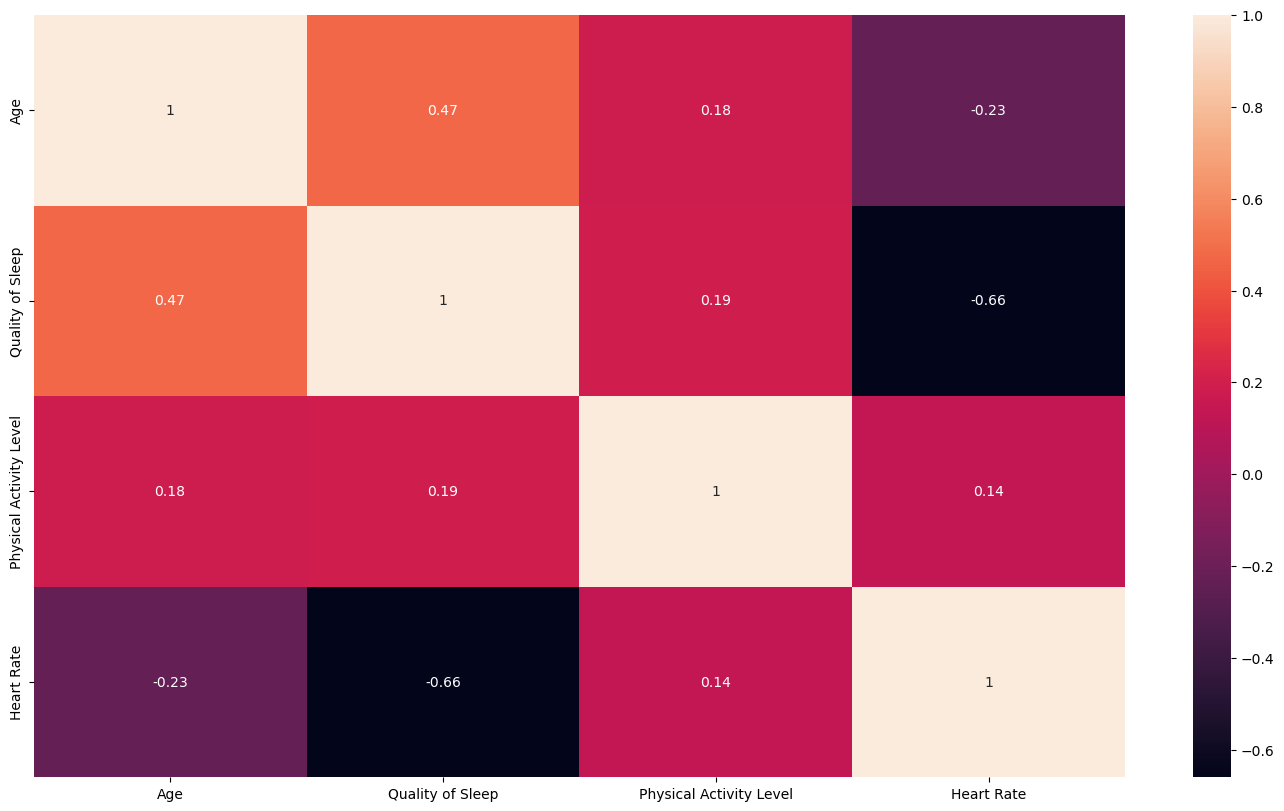

In [8]:
sns.heatmap(dataExaminada.corr(numeric_only=True), annot = True)


Revisar Correlación entre la variables niveles de estrés y tiempo durmiendo



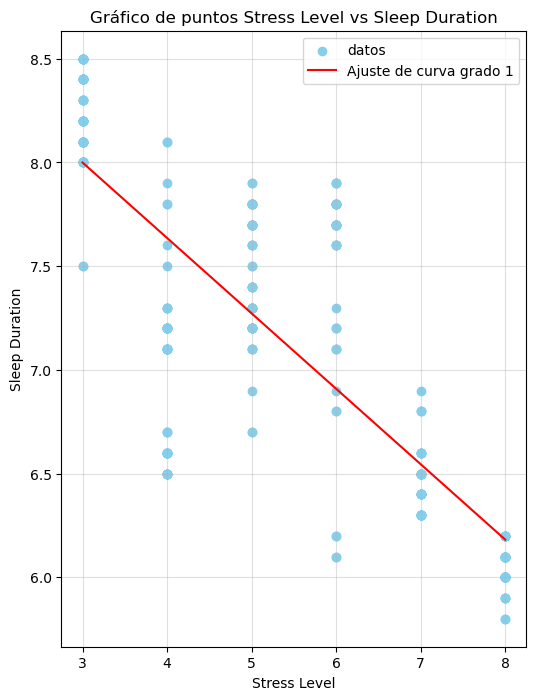

In [4]:
def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes
X=data['Stress Level'].to_numpy()
Y=data['Sleep Duration'].to_numpy()
Coef_P1_P3 = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_P1_P3[0] + Coef_P1_P3[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Gráfico de puntos Stress Level vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

Filtro de edades

<Axes: xlabel='Age'>

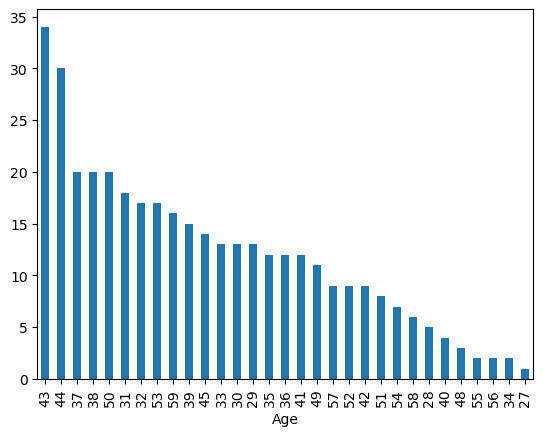

In [26]:
edades=data['Age'].value_counts()
edades.plot(kind="bar")



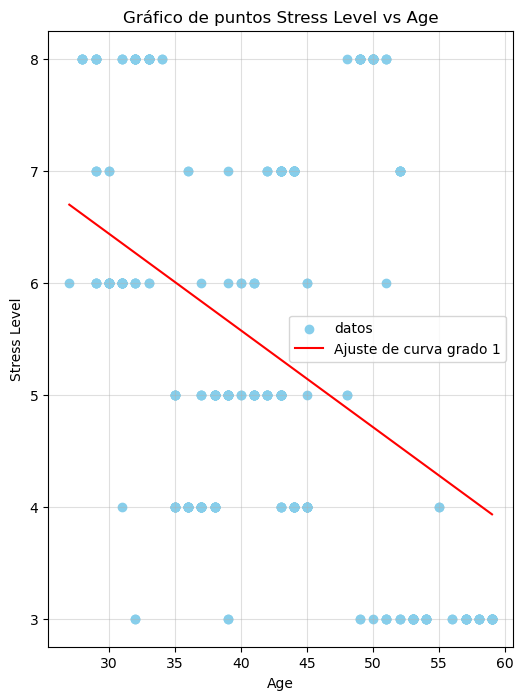

In [5]:
X=data['Age'].to_numpy()
Y=data['Stress Level'].to_numpy()
Coef_Ed_Estr = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
X = data['Age'].to_numpy().reshape(-1, 1)
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Ed_Estr[0] + Coef_Ed_Estr[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Gráfico de puntos Stress Level vs Age')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()


<Axes: xlabel='Occupation'>

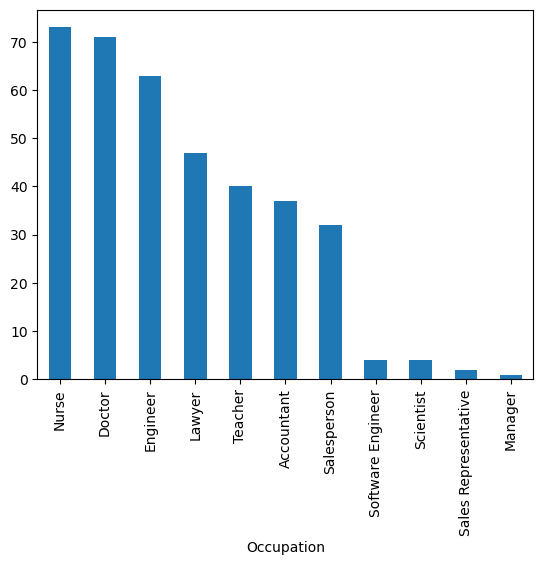

In [7]:
profesiones_count=data["Occupation"].value_counts()
profesiones_count.plot(kind="bar")